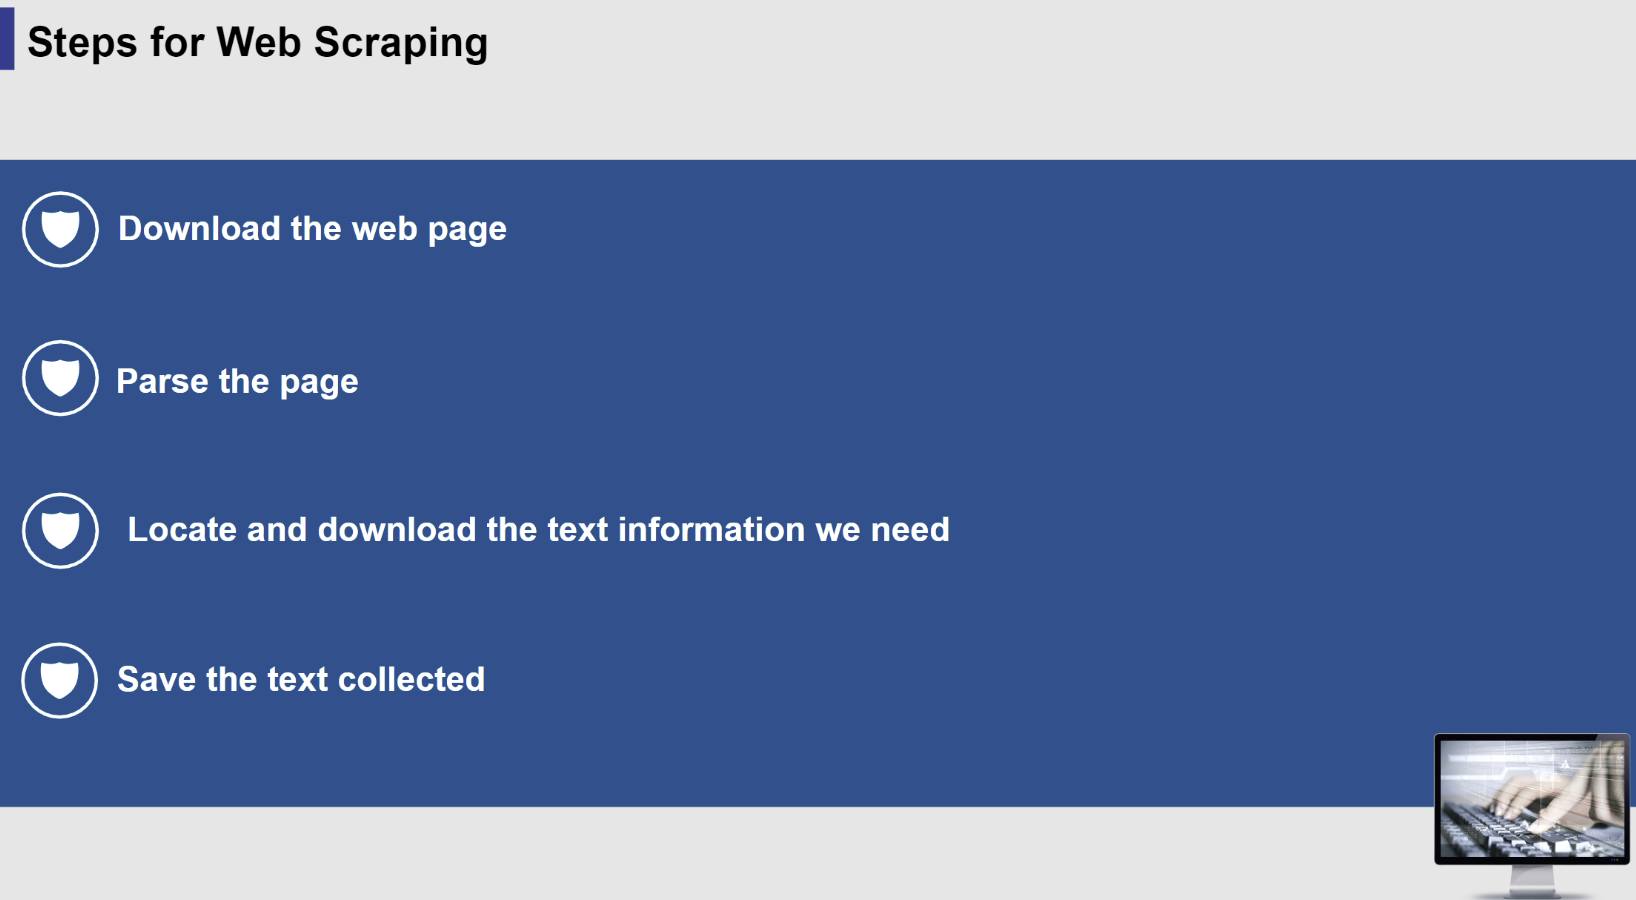

# 1. BeautifulSoup example: Downloading weather data

We want to extract information about the next seven-day Denton weather from the National Weather Service website.

https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.XaXfI0ZKjb0

Part one (locate the information we need):

(1) Download the web page containing the forecast.

(2) Create a BeautifulSoup class to parse the page.

(3) Find the div with id seven-day-forecast, and assign to seven_day

(4) Inside seven_day, find each individual forecast item.

(5) Extract and print the first forecast item.

In [ ]:
#import the library used to query a website

import urllib.request
from bs4 import BeautifulSoup

# Step1: Download or search the web page containing the forecast.
url = "https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.XaXfI0ZKjb0"

#query the website and return the html to the variable 'page'
page = urllib.request.urlopen(url)

# Step 2: Parse the html in the 'soup' variable, and store it in BeautifulSoup class
soup = BeautifulSoup(page, 'html.parser')

#print(soup)

# Step 3.1: Locate and download the text information we need.
# Locate the section that contains the seven-day weather information by using the div "id"
seven_day = soup.find(id="seven-day-forecast")

# print(seven_day)

# Step 3.2: Find each individual forecast item from seven_day.
forecast_items = seven_day.find_all(class_="tombstone-container")

# print(forecast_items)

# Step 4: Save the text collected: tonight information: select the first item in the list
tonight = forecast_items[0]

# print(tonight)

# Extract and print the first forecast item.
print(tonight.prettify())

#prettify() is a method of the BeautifulSoup object that formats an HTML document into a more readable, indented format. In other words, it beautifies the HTML code, making its structure clear and hierarchical.

<div class="tombstone-container">
 <p class="period-name">
  Tonight
 </p>
 <p>
  <img alt="Tonight: A 20 percent chance of showers and thunderstorms, mainly between 1am and 4am.  Mostly cloudy, with a low around 68. East wind 5 to 10 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/nscttsra20.png" title="Tonight: A 20 percent chance of showers and thunderstorms, mainly between 1am and 4am.  Mostly cloudy, with a low around 68. East wind 5 to 10 mph, with gusts as high as 20 mph. "/>
 </p>
 <p class="temp temp-low">
  Low: 68 °F
 </p>
 <p class="short-desc">
  Slight Chance
  <br/>
  T-storms
 </p>
</div>



Part two (Extracting information from the page):

As you can see, inside the forecast item tonight is all the information we want. There are 4 pieces of information we can extract:

(1) The name of the forecast item — in this case, Tonight.

(2) The description of the conditions — this is stored in the title property of img.

(3) A short description of the conditions — in this case, Clear, with a low around 67. East wind around 5 mph..

(4) The temperature Low — in this case, 67 °F.

In [ ]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Tonight
Slight ChanceT-storms
Low: 68 °F


In [ ]:
# Extract the title attribute from the img tag

img = tonight.find("img")
desc = img['title']
print(desc)

Tonight: A 20 percent chance of showers and thunderstorms, mainly between 1am and 4am.  Mostly cloudy, with a low around 68. East wind 5 to 10 mph, with gusts as high as 20 mph. 


Part 3 (Extracting all the information from the page):

Now that we know how to extract each individual piece of information, we can combine our knowledge with css selectors and list comprehensions to extract everything at once.

In the below code, we:

The select() method finds elements in the tombstone-container class and selects from those elements the child elements that have the period-name class.

Use a list comprehension to call the get_text method on each BeautifulSoup object.


In [ ]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Tonight',
 'Thursday',
 'Thursday Night',
 'Friday',
 'Friday Night',
 'Saturday',
 'Saturday Night',
 'Sunday',
 'Sunday Night']

In [ ]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Slight ChanceT-storms', 'Sunny', 'Clear', 'Sunny', 'Mostly Clear', 'Mostly Sunny', 'Partly Cloudy', 'Hot', 'Mostly Clear']
['Low: 68 °F', 'High: 88 °F', 'Low: 67 °F', 'High: 95 °F', 'Low: 75 °F', 'High: 98 °F', 'Low: 75 °F', 'High: 99 °F', 'Low: 74 °F']
['Tonight: A 20 percent chance of showers and thunderstorms, mainly between 1am and 4am.  Mostly cloudy, with a low around 68. East wind 5 to 10 mph, with gusts as high as 20 mph. ', 'Thursday: Sunny, with a high near 88. Northeast wind around 5 mph. ', 'Thursday Night: Clear, with a low around 67. East northeast wind around 5 mph becoming calm. ', 'Friday: Sunny, with a high near 95. Heat index values as high as 98. Calm wind becoming south southwest around 5 mph in the morning. ', 'Friday Night: Mostly clear, with a low around 75. South southeast wind around 5 mph. ', 'Saturday: Mostly sunny, with a high near 98. South southwest wind 5 to 10 mph. ', 'Saturday Night: Partly cloudy, with a low around 75. South wind around 5 mph. ', 'S

In [ ]:
import pandas as pd
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})
weather

,period,short_desc,temp,desc
0,Tonight,Slight ChanceT-storms,Low: 68 °F,Tonight: A 20 percent chance of showers and th...
1,Thursday,Sunny,High: 88 °F,"Thursday: Sunny, with a high near 88. Northeas..."
2,Thursday Night,Clear,Low: 67 °F,"Thursday Night: Clear, with a low around 67. E..."
3,Friday,Sunny,High: 95 °F,"Friday: Sunny, with a high near 95. Heat index..."
4,Friday Night,Mostly Clear,Low: 75 °F,"Friday Night: Mostly clear, with a low around ..."
5,Saturday,Mostly Sunny,High: 98 °F,"Saturday: Mostly sunny, with a high near 98. S..."
6,Saturday Night,Partly Cloudy,Low: 75 °F,"Saturday Night: Partly cloudy, with a low arou..."
7,Sunday,Hot,High: 99 °F,"Sunday: Mostly sunny and hot, with a high near..."
8,Sunday Night,Mostly Clear,Low: 74 °F,"Sunday Night: Mostly clear, with a low around ..."


# 2. Download information from google scholar


https://scholar.google.com/scholar?hl=en&as_sdt=0,44&q=Education+LLMs+NLP


2.1 Use ChatGPT

You can input your prompt and let GPT give your feedback

Prompt: From the HTML file, extract the Title of the article, Year, Authors and Abstract from the article and save as a CSV files.

https://chatgpt.com/share/dbe45dcd-8c38-4c95-af5e-6c39a9ffaab5

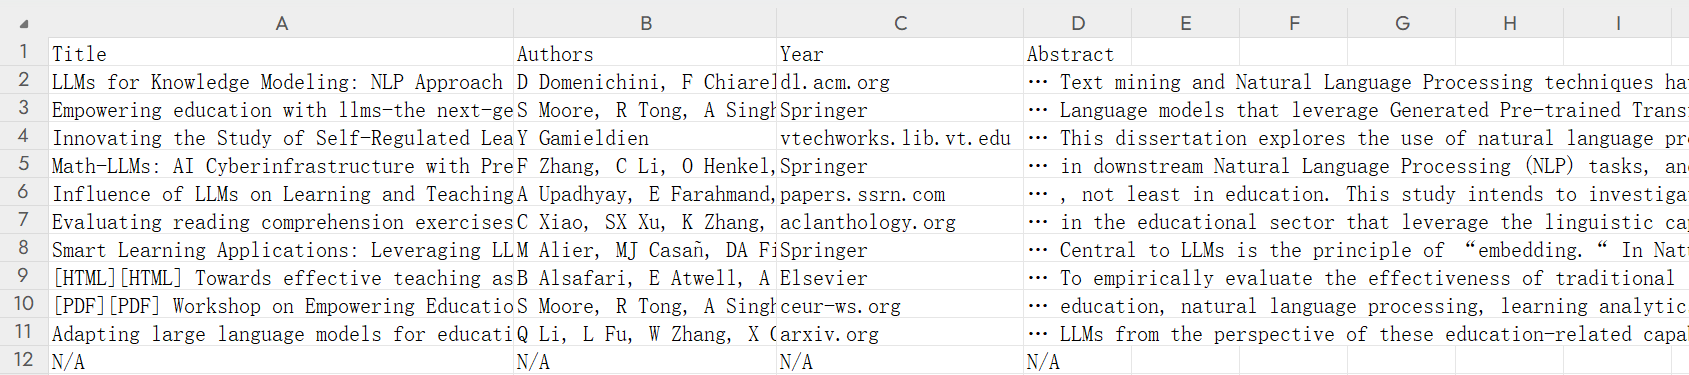

From the HTML file, extract the Title of the article, Year, Authors and Abstract from the article and save as a CSV files.

Here is the Title of one paper:

```
<h3 class="gs_rt">
   <a href="link-to-article">Title of the article</a>
</h3>
```
Here are the Authors of one paper:  

```
<div class="gs_a">Author Name - Journal Name - Year</div>
```
Here is the Abstract  of one paper:  

```
<div class="gs_rs">This is a brief abstract of the article...</div>
```

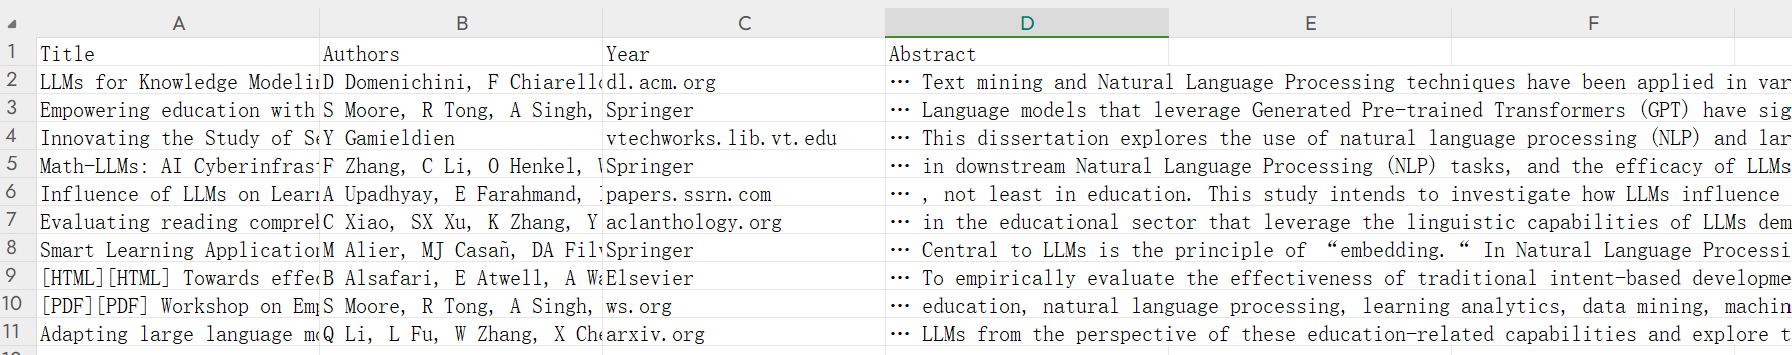

P1

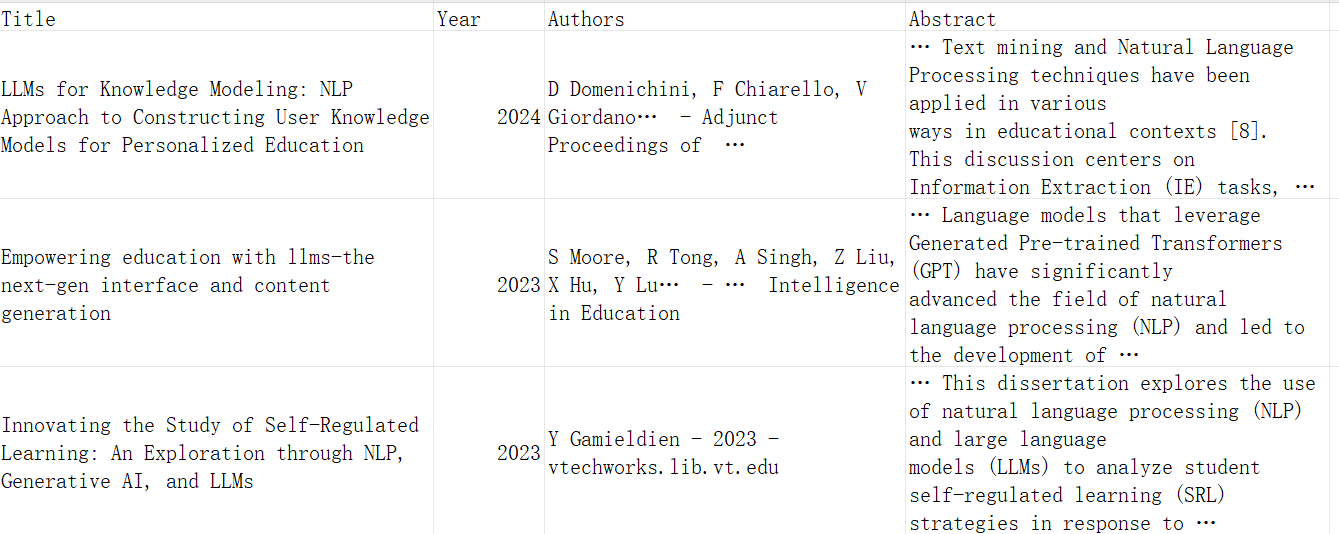

P2

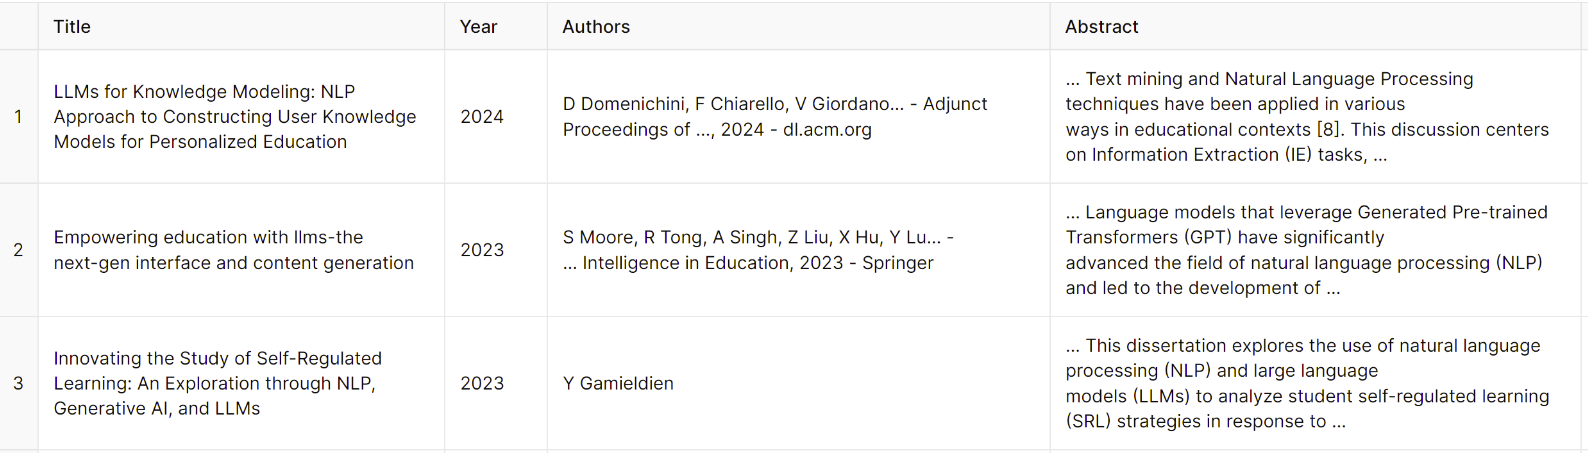

**Question**

1. Will ChatGPT give us the same answer? Why?
2. Do you think ChatGPT is reliable?
3. How to evaluate the accuracy of the results given by GPT？

2.2 Use beautifulsoup4

In [ ]:
!pip install beautifulsoup4 lxml

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Education LLMs NLP - Google Scholar.html to Education LLMs NLP - Google Scholar (3).html


In [ ]:
#import the library used to query a website
from bs4 import BeautifulSoup
import pandas as pd

# Step1: Download or search the web page.
file_name = 'Education LLMs NLP - Google Scholar.html'

# Open and read the HTML file
with open(file_name, 'r', encoding='utf-8') as file:
    content = file.read()

# Step 2: Parse the html
soup = BeautifulSoup(content, 'html.parser')

# Step 3: Locate and download the text information we need.
entries = soup.find_all('div', class_='gs_ri')

# Step 4: Save the text collected: Extract the title and URL for each paper
data = []
for entry in entries:
    title_tag = entry.find('h3', class_='gs_rt')
    if title_tag and title_tag.a:
        title = title_tag.a.text
        url = title_tag.a['href']
        data.append({'Title': title, 'URL': url})

df = pd.DataFrame(data)

csv_filename = 'paper_titles_and_urls.csv'
df.to_csv(csv_filename, index=False)

from google.colab import files
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Function to extract article information based on the URL
def extract_article_info(url):
    try:
        # Send a request to the URL
        response = requests.get(url)
        if response.status_code != 200:
            return {"Title": "N/A", "Year": "N/A", "Authors": "N/A", "Abstract": "N/A"}

        # Parse the page content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract information based on the URL domain
        if "acm.org" in url:
            # For ACM Digital Library
            title = soup.find('h1', class_='citation__title').text if soup.find('h1', class_='citation__title') else "N/A"
            authors = ', '.join([a.text for a in soup.find_all('a', class_='author-name')])
            year = soup.find('span', class_='CitationCoverDate').text if soup.find('span', class_='CitationCoverDate') else "N/A"
            abstract = soup.find('div', class_='abstractSection abstractInFull').text.strip() if soup.find('div', class_='abstractSection abstractInFull') else "N/A"

        elif "springer.com" in url:
            # For SpringerLink
            title = soup.find('h1', class_='c-article-title').text.strip() if soup.find('h1', class_='c-article-title') else "N/A"
            authors = ', '.join([a.text for a in soup.find_all('span', class_='c-article-author__name')])
            year = soup.find('span', class_='c-article-year').text if soup.find('span', class_='c-article-year') else "N/A"
            abstract = soup.find('div', class_='c-article-section__content').text.strip() if soup.find('div', class_='c-article-section__content') else "N/A"

        elif "vtechworks.lib.vt.edu" in url:
            # For VTechWorks
            title = soup.find('h1', class_='item-title').text if soup.find('h1', class_='item-title') else "N/A"
            authors = soup.find('div', class_='author').text.strip() if soup.find('div', class_='author') else "N/A"
            year = soup.find('div', class_='date').text.strip() if soup.find('div', class_='date') else "N/A"
            abstract = soup.find('div', class_='abstract').text.strip() if soup.find('div', class_='abstract') else "N/A"

        else:
            # Default case for unknown databases
            title = soup.title.text if soup.title else "N/A"
            authors = "N/A"
            year = "N/A"
            abstract = "N/A"

        return {"Title": title, "Year": year, "Authors": authors, "Abstract": abstract}

    except Exception as e:
        return {"Title": "N/A", "Year": "N/A", "Authors": "N/A", "Abstract": "N/A"}

# Load the CSV file containing URLs
df = pd.read_csv('paper_titles_and_urls.csv')

# Initialize a list to store the results
articles_info = []

# Iterate over each row in the DataFrame and extract information for each URL
for index, row in df.iterrows():
    article_url = row['URL']
    print(f"Processing URL: {article_url}")
    info = extract_article_info(article_url)
    articles_info.append(info)

    # Adding a delay to avoid overwhelming the server
    time.sleep(2)

# Convert the list of dictionaries to a DataFrame
df_articles_info = pd.DataFrame(articles_info)

# Save the extracted data to a CSV file
csv_output_path = 'extracted_articles_info.csv'
df_articles_info.to_csv(csv_output_path, index=False)

print(f"Data saved to {csv_output_path}")


Processing URL: https://dl.acm.org/doi/abs/10.1145/3631700.3665231
Processing URL: https://link.springer.com/chapter/10.1007/978-3-031-36336-8_4
Processing URL: https://vtechworks.lib.vt.edu/items/97334c0c-9eee-464b-8a79-b3145de245de
Processing URL: https://link.springer.com/article/10.1007/s40593-024-00416-y
Processing URL: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4716855
Processing URL: https://aclanthology.org/2023.bea-1.52/
Processing URL: https://link.springer.com/chapter/10.1007/978-981-97-1814-6_18
Processing URL: https://www.sciencedirect.com/science/article/pii/S2949719124000499
Processing URL: https://ceur-ws.org/Vol-3487/xpreface.pdf


Processing URL: https://arxiv.org/abs/2401.08664
Data saved to extracted_articles_info.csv


In [ ]:
from google.colab import files
files.download('extracted_articles_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Note:Now we only have the URL. Since different databases store papers in various formats, we need to determine the structure or format of the abstract based on the URL, as different databases may store abstracts differently.**

```
For example, in Springerlink, the abstract is located in a <div> tag with the class name c-article-section__content and the ID Abs1-content. Inside this <div>, there is a <p> tag that contains the actual summary text.
```

Exercise 1: Try to crawl papers from the above platforms.

#3. Scraping the data using API's from websites
There are some example in Week_4_Web_Scraping_Class_Demo-1.ipynb and Web_Scraping (1)-1.ipynb.

# **Web scraping with multiple pages**

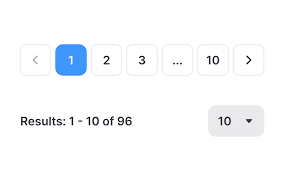

In [1]:
import requests
import csv
from bs4 import BeautifulSoup
import time

#Create a list to hold extracted data
people_data = []

# Step 1: Download the page

for i in range(1,4,1):
  # Add a delay of 5 seconds between each page request (you can adjust this value)
  time.sleep(5)

  # Here i have used formated string literal allows embedding expressions inside curly braces {}.
   # In this case, {i} is replaced by the current value of i in the loop, dynamically updating the URL for different pages.

  movie_url = f'https://www.themoviedb.org/person?language=en-US&page={i}'
  print(movie_url)
  movie_page = requests.get(movie_url)

  # Step 2: Parse the HTML in the 'movie_page.text' variable, and store it in BeautifulSoup class
  movie_page_html = BeautifulSoup(movie_page.text, 'html.parser')

  # Step 3: Find all people information
  people_cards = movie_page_html.find_all('div', class_="fifty_square")

# Step 4: Iterate over each person card and extract relevant information
  for card in people_cards:
    image_tag = card.find('img', class_="profile")
    image_url = image_tag['src'] if image_tag else None

    meta = card.find('div', class_='meta')
    name = meta.find('p', class_='name').get_text(strip=True) if meta else None
    sub = meta.find('p', class_='sub').get_text(strip=True) if meta else None

    # Append the data as a dictionary
    people_data.append({
        'Name': name,
        'Image URL': image_url,
        'Films': sub
    })

# Step 5: Write the extracted data into a CSV file
with open('people_info.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['Name', 'Image URL', 'Films'])
    writer.writeheader()
    writer.writerows(people_data)

print("Data has been written to 'people_info.csv'")


https://www.themoviedb.org/person?language=en-US&page=1
https://www.themoviedb.org/person?language=en-US&page=2
https://www.themoviedb.org/person?language=en-US&page=3
Data has been written to 'people_info.csv'
